# 2 Exercice 2


1. Charger le jeu de données et fournir quelques éléments d’analyse exploratoire (e.g., statistiques descriptives,
analyse ACP) illustrant votre prise en main du jeu de données.

In [34]:
#importation du jeu de données
# generic imports #
# Importation des packages et fonctions principales
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import collections

In [2]:
#importation des jeu de données
X_test = pd.read_csv("H:/Grenoble/SSD_M2/Fouille de Données/exam-mi-parcours/dataset-exo2/test-data.txt", sep=' ')
train = pd.read_csv("H:/Grenoble/SSD_M2/Fouille de Données/exam-mi-parcours/dataset-exo2/train-data.txt", sep=' ')
train

,Gram,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240
0,NEG,0.058753,0.057243,0.050666,0.054601,0.051106,0.054563,0.052369,0.049727,0.048300,...,0.058277,0.060221,0.057840,0.058580,0.058319,0.061119,0.057462,0.058557,0.062106,0.059730
1,NEG,0.047111,0.052490,0.051228,0.052810,0.053670,0.049795,0.049764,0.047964,0.050901,...,0.062517,0.061925,0.059166,0.058579,0.060245,0.060575,0.060001,0.058751,0.059924,0.061063
2,NEG,0.048959,0.058325,0.042828,0.053562,0.052253,0.051208,0.048307,0.051011,0.046705,...,0.060503,0.059426,0.061838,0.057495,0.062276,0.056551,0.061512,0.061728,0.062117,0.059941
3,NEG,0.056847,0.054794,0.049040,0.057075,0.047005,0.052528,0.049503,0.050500,0.050235,...,0.060669,0.061445,0.062393,0.059454,0.058955,0.060038,0.060401,0.057667,0.060647,0.061984
4,NEG,0.053074,0.045115,0.044600,0.050904,0.048808,0.051350,0.049644,0.045842,0.048229,...,0.061864,0.060919,0.059285,0.060180,0.059578,0.061590,0.061065,0.059392,0.059572,0.060539
5,NEG,0.045762,0.050856,0.046343,0.049977,0.050103,0.046755,0.044502,0.049204,0.041216,...,0.063792,0.060825,0.061570,0.062283,0.060442,0.060040,0.062608,0.060430,0.062509,0.059948
6,NEG,0.054726,0.044361,0.043610,0.046380,0.048367,0.047311,0.044241,0.043334,0.044433,...,0.062720,0.063257,0.062056,0.060440,0.061183,0.060879,0.060438,0.062284,0.059834,0.061014
7,NEG,0.051261,0.054301,0.050142,0.048331,0.048342,0.051445,0.048431,0.051936,0.046156,...,0.061466,0.062276,0.061708,0.060381,0.059365,0.059868,0.060469,0.062332,0.061495,0.058688
8,NEG,0.054891,0.057725,0.052564,0.056230,0.055231,0.052877,0.053442,0.054289,0.048348,...,0.060512,0.058096,0.060470,0.060608,0.059182,0.060938,0.061279,0.059269,0.059480,0.058915
9,NEG,0.043783,0.041114,0.047714,0.043018,0.044293,0.047038,0.042148,0.043120,0.044610,...,0.062045,0.060723,0.059694,0.060201,0.059820,0.060425,0.059671,0.059686,0.060560,0.061402


In [6]:
#separation train en Y_train et X_train
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]

#taille des jeu de données
#train
print(X_train.shape)
print(Y_train.shape)
#test
print(X_test.shape)

(2403, 240)
(2403,)
(3130, 240)


In [3]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240
count,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,...,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000
mean,0.047570,0.047884,0.048231,0.048175,0.048024,0.047503,0.046707,0.045812,0.044950,0.043844,...,0.072823,0.072663,0.072458,0.072222,0.072137,0.072056,0.072028,0.071936,0.071853,0.071681
std,0.009657,0.009319,0.009179,0.008812,0.008551,0.008223,0.007776,0.007354,0.007106,0.006836,...,0.008287,0.008323,0.008272,0.008234,0.008240,0.008181,0.008142,0.008049,0.008047,0.008048
min,0.015114,0.017491,0.016919,0.022140,0.024088,0.024161,0.025632,0.026245,0.024983,0.024653,...,0.046791,0.046412,0.047839,0.047051,0.047247,0.047513,0.047566,0.046938,0.046515,0.047470
25%,0.041200,0.041605,0.041741,0.042180,0.042153,0.041766,0.041246,0.040698,0.039977,0.039166,...,0.066821,0.066552,0.066394,0.066148,0.066207,0.066108,0.066139,0.066161,0.066084,0.065857
50%,0.047150,0.047620,0.047925,0.047874,0.047578,0.046879,0.046256,0.045464,0.044429,0.043371,...,0.071572,0.071567,0.071313,0.071047,0.071090,0.071004,0.070990,0.070849,0.070710,0.070559
75%,0.053889,0.053704,0.054217,0.053827,0.053740,0.053059,0.051659,0.050510,0.049369,0.048128,...,0.077477,0.077425,0.077169,0.076936,0.076766,0.076642,0.076559,0.076516,0.076278,0.076265
max,0.083199,0.079429,0.080889,0.087333,0.081704,0.079412,0.078034,0.076380,0.074481,0.068391,...,0.098727,0.099649,0.102033,0.100595,0.100046,0.101143,0.100907,0.098476,0.100069,0.100099


Ces analyses nous donnent des informations sur la taille des différents jeu de données. La fonction describe nous montre que les varaibles explicatives sont relativement proches.

In [7]:
#calcul correlation
np.corrcoef(X_train)

array([[1.        , 0.976069  , 0.97034568, ..., 0.56345816, 0.24994846,
        0.23113081],
       [0.976069  , 1.        , 0.98054058, ..., 0.60710297, 0.31227439,
        0.26147771],
       [0.97034568, 0.98054058, 1.        , ..., 0.65109974, 0.37305612,
        0.308206  ],
       ...,
       [0.56345816, 0.60710297, 0.65109974, ..., 1.        , 0.89513514,
        0.8029807 ],
       [0.24994846, 0.31227439, 0.37305612, ..., 0.89513514, 1.        ,
        0.82316069],
       [0.23113081, 0.26147771, 0.308206  , ..., 0.8029807 , 0.82316069,
        1.        ]])

 Nous voyons également que certaines varaibles sont fortement corrélés.

In [9]:
#remplacement des valeurs
Y_train_num = Y_train.copy()

#changement de NEG/POS en 0/1
Y_train_num[Y_train_num == "NEG"] =  0
Y_train_num[Y_train_num == "POS"] =  1

Nous commençons cette analyse descriptive par un histogramme pour avoir une idée de la proportion des deux classes dans le jeu de données d'apprentissage.

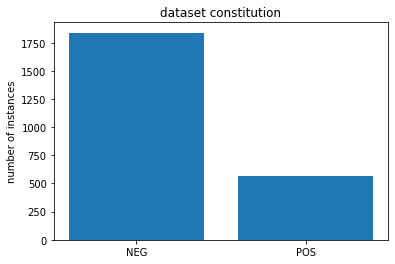

In [10]:
class_ids = np.unique(Y_train_num)
K = len(class_ids)
counts = np.bincount(Y_train_num)
plt.bar(range(K), counts)
plt.ylabel('number of instances')
plt.title('dataset constitution')
plt.xticks(range(K), np.unique(Y_train))
plt.show()


Avec cet histogramme, nous voyons une surreprésentation des individus négatifs par à ceux positifs.

Dans un second une ACP a été mise en place pour le jeu d'entrainement. Les donneés sont ensuite représentées en fonction des deux premières dimensions de l'ACP.

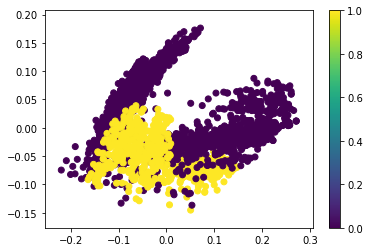

In [19]:
#representation de l'ACP
# fit PCA (with 2 PCs)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)
Xpca = pca.transform(X_train) 
#représentation des deux premiers axes
plt.scatter(Xpca[:,0],Xpca[:,1], c = Y_train_num)
plt.colorbar()
plt.show()

Nous avons la représentation des données avec un code couleur correspondant aux deux groupes négatifs et positifs

Nous allons maintenant passer au jeu de test.

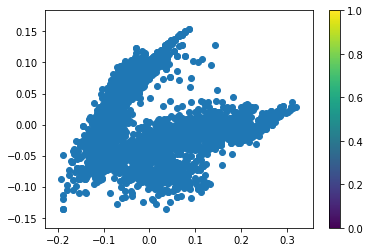

In [20]:
# fit PCA (with 2 PCs)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_test)
Xpca_test = pca.transform(X_test) 
#représentation des deux premiers axes
plt.scatter(Xpca_test[:,0],Xpca_test[:,1])
plt.colorbar()
plt.show()

L'ACP a été réalisée pour le jeu de données de test. Nous voyons que l'allure globale des données se rapproche du jeu de données de train. Toutes les données sont de la même couleure puisque naturellement nous ne connaissons pas leur groupes, néagtif ou positif.

## 2. Construire un modèle de prédiction visant à maximiser l’aire sous la courbe ROC.

## 1er Modèle - Random Forest

In [15]:
# On récupère les données 'Gram' et on les mets sous forme de 0 et 1
data_target = preprocessing.LabelBinarizer().fit_transform(Y_train)

# On sépare les données en deux, 'train' et 'test' 
X_train, X_test, Y_train, Y_test = train_test_split(X_train, data_target, test_size = 0.25, random_state = 1)

Séparation du jeu de données en train et test pour la construction du modèle. On va utiliser un modèle avec l'algorithme de Random Forest

In [16]:
# On construit le modèle avec 1000 arbres
rf1 = RandomForestClassifier(n_estimators = 1000, random_state = 8)

# On crée le modèle avec les données de 'train'
rf1.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

Calcul des prédictions avec les données de test dont nous connaissons les vrais valeurs

In [17]:
# On calcule les prédictions avec les données de tests pour les comparer aux données réelles
predictions1 = rf1.predict(X_test)

# On peut également voir les probabilités que chaque individu appartienne au groupe 0 ou 1
pred_proba1 = rf1.predict_proba(X_test)
np.round(pred_proba1, 3)

array([[0.726, 0.274],
       [0.999, 0.001],
       [0.999, 0.001],
       ...,
       [1.   , 0.   ],
       [0.948, 0.052],
       [0.974, 0.026]])

Nous voyons que nous obtenons des probabilités assez extrême ce qui est positif. Nous devrions pas avoir de mail à choisir la classe adéquate.

In [20]:
accuracy = accuracy_score(Y_test, predictions1)
print("Accuracy : %0.5f" % accuracy)

Accuracy : 0.97338


Nous obtenons un très bon taux d'accuracy. Nous allons maintenant calculer la courbe ROC et l'AUC pour avoir une idée plus précise de la qualité des estimations

<function matplotlib.pyplot.show(*args, **kw)>

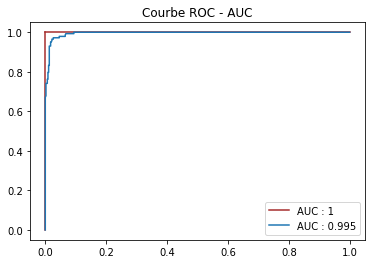

In [26]:
# fpr ou False Positive Rate = (1 - la sensibilité) 
# tpr = spécificité
lines = [(0,0), (0,1), 'brown',
        (0,1), (1,1), 'brown']
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, pred_proba1[:,1])
plt.plot(*lines[0:3], label = 'AUC : 1')
plt.plot(*lines[3:7])
plt.plot(fpr1, tpr1, label='AUC : %0.3f' % sklearn.metrics.roc_auc_score(Y_test, pred_proba1[:,1]))
plt.legend(loc="lower right" )
plt.title("Courbe ROC - AUC")
plt.show

Nous voyons que nous courbe ROC est très proche de la courbe parfaite.

## 3.  Evolution de la précision et de la spécificité

In [31]:
y_pred = cross_val_predict(rf1, X_train, Y_train.ravel(), cv=3)


Répartition des valeurs positives et négatives

In [33]:
collections.Counter(y_pred)

Counter({0: 1388, 1: 414})

Nous voyons que nous gardons globalement la même proportion NEG/POS que dans le jeu d'entraînement

On trace maintenant la courbe "Precision - Recall"

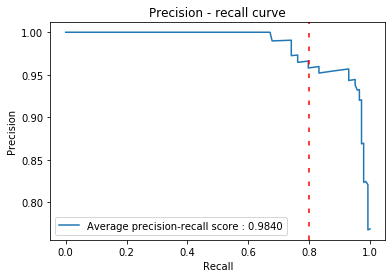

In [44]:


y_true = Y_test
y_scores = rf1.predict_proba(X_test)[:,1]

#precsion, recall..
precision, recall, thresholds = precision_recall_curve(
    y_true, y_scores)

## average precision
average_precision = average_precision_score(y_true, y_scores)

plt.plot(recall, precision, label = 'Average precision-recall score : %0.4f' %average_precision)
plt.title("Precision - recall curve")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc = "lower left")
plt.axvline(x=0.8, color = "red", dashes = [3,6])
plt.show()

L'aire sous la courbe est très élevé, elle est supérieur à 95%

In [45]:
recall2 = recall[recall>0.8]
precision80 = precision[np.argmin(recall2)]
print("La précision lorsque la sensibilité est de 80 pourcent est de : %0.5f" % precision80)

La précision lorsque la sensibilité est de 80 pourcent est de : 0.95833


## 4. Calcul des prédictions

Pour finir, nous calculons les prédictions pour le jeu de test dont nous ne connaissons pas les vrais valeurs

In [48]:
PredictionsTest = rf1.predict(X_test)
collections.Counter(PredictionsTest)

Counter({0: 456, 1: 145})

In [49]:
#transformation des 0/1 en NEG/POS 
PredictionsFinales = ["" for x in range(len(PredictionsTest))]
for i in range(len(PredictionsTest)):
    if PredictionsTest[i] == 0:
        PredictionsFinales[i] = "NEG"
    else:
        PredictionsFinales[i] = "POS"

pd.DataFrame(PredictionsFinales).T

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,NEG,NEG,NEG,NEG,NEG,NEG,NEG,NEG,POS,NEG,...,NEG,POS,NEG,NEG,NEG,NEG,NEG,NEG,NEG,NEG


In [52]:
#Exportation du fichier en txt
fichier = open("Agblodoe_Vrignaud_exo-2.txt", 'w+')
fichier.write(str(PredictionsFinales))

4207